## CNN for Image Classification
https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras

Convolutional Neural Networks, or CNNs for short, are a type of network designed for image input.

They are comprised of models with convolutional layers that extract features (called feature maps) and pooling layers that distill features down to the most salient elements.

CNNs are most well-suited to image classification tasks, although they can be used on a wide array of tasks that take images as input.

A popular image classification task is the MNIST handwritten digit classification. It involves tens of thousands of handwritten digits that must be classified as a number between 0 and 9.

The tf.keras API provides a convenient function to download and load this dataset directly.

We can train a CNN model to classify the images in the MNIST dataset.

Note that the images are arrays of grayscale pixel data; therefore, we must add a channel dimension to the data before we can use the images as input to the model. The reason is that CNN models expect images in a channels-last format; that is, each example to the network has the dimensions [rows, columns, channels], where channels represent the color channels of the image data.

It is also a good idea to scale the pixel values from the default range of 0-255 to 0-1 when training a CNN.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets.mnist import load_data

In [3]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
tf.get_logger().setLevel('ERROR')

## Load the Dataset

In [6]:
(X_train, y_train), (X_test, y_test) = load_data()

In [7]:
# Determine the shape of the input images before reshape data to have a single channel
print(X_train.shape[1:])

(28, 28)


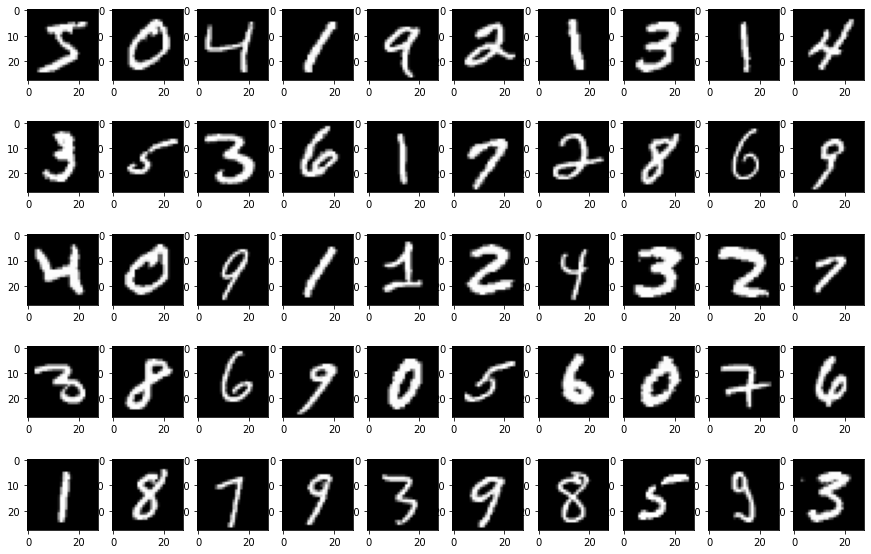

In [8]:
# Plotting examples of the Dataset
rows = 5
cols = 10
plt.figure(figsize=(15,10))
for i in range(rows * cols):
    # define subplot
    plt.subplot(rows, cols, i+1)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [9]:
# Reshape data to have a single channel
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [10]:
X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [11]:
# Determine the shape of the input images
in_shape = X_train.shape[1:]

In [12]:
# Determine the number of classes
n_classes = len(np.unique(y_train))
print(in_shape, n_classes)

(28, 28, 1) 10


In [13]:
# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## Step 1: Define the Model

In [14]:
# Define model
model = Sequential()
# Convolutional Part of the neural network
# Input layer
model.add(tfl.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
# Pooling layer
model.add(tfl.MaxPool2D((2, 2)))
# Flatten layer
model.add(tfl.Flatten())
# Hidden Layer(s)
model.add(tfl.Dense(100, activation='relu', kernel_initializer='he_uniform'))
# Reduce Overfitting with Dropout
model.add(tfl.Dropout(0.5))
# Batch normalization Layer to Accelerate Training
model.add(tfl.BatchNormalization())
# Output Layer
model.add(tfl.Dense(n_classes, activation='softmax'))

In [15]:
# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                         

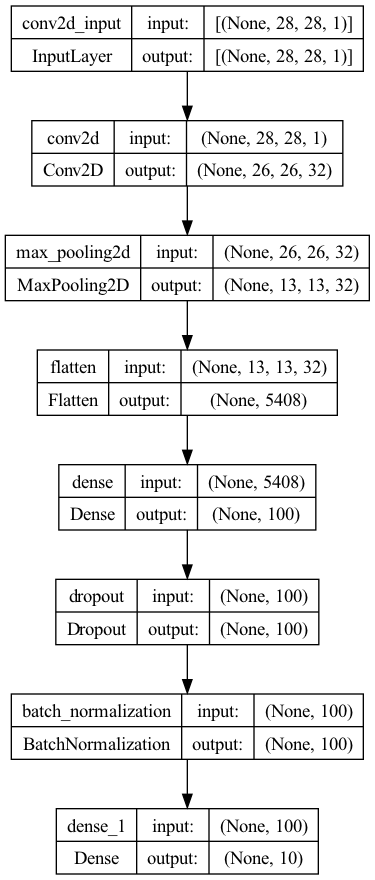

In [16]:
# summarize the model
plot_model(model, 'model.png', show_shapes=True)

## Step 2: Compile the Model

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Step 3: Fit the Model

In [18]:
# Configure early stopping to stop training when a monitored metric has stopped improving.
es = EarlyStopping(monitor='val_loss', patience=5)
# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0, validation_data=(X_test, y_test), callbacks=[es])

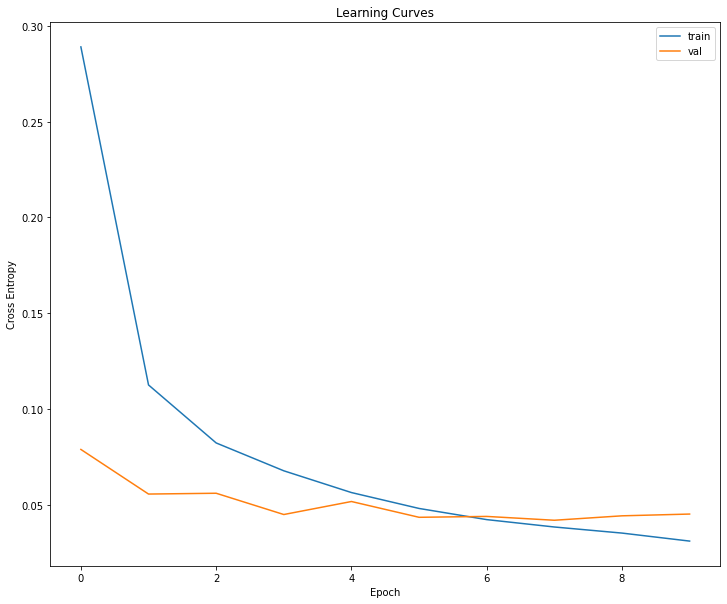

In [19]:
# Plot learning curves
# The cross-entropy loss for the training dataset is accessed via the 'loss' key
# The loss on the validation dataset is accessed via the 'val_loss' key on the history attribute of the history object.
plt.figure(figsize=(12,10))
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

## Step 4: Evaluate the Model

In [20]:
# Evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.986


In [21]:
# Save model to file
model.save('model.h5')

## Step 5: Make Prediction

In [22]:
# load the model from file
the_model = load_model('model.h5')

1/1 [==============================] - 0s 155ms/step
Predicted: class=3


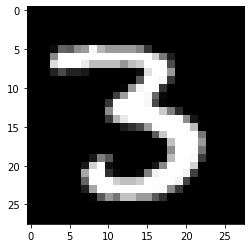

In [23]:
# Make a prediction
image = X_train[12]
y_pred = the_model.predict(np.asarray([image]))
print('Predicted: class=%d' % np.argmax(y_pred))
plt.imshow(image, cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [24]:
y_pred

array([[2.4934487e-13, 2.3063521e-14, 2.9439352e-13, 1.0000000e+00,
        1.7002189e-13, 4.9009078e-11, 2.4486454e-14, 3.7204771e-12,
        2.7785941e-13, 2.2878359e-11]], dtype=float32)